<a href="https://colab.research.google.com/github/Shashank251225/Cardiovascular-Risk-Prediction-/blob/main/cardio_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cardiovascular Heart Diseace Prediction**

##**Data Description**
###**Demographic:**
###• Sex: male or female("M" or "F")
###• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
###**Behavioral:**
###• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
###• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###**Medical( history):**
###• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
###• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
###• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
###• Diabetes: whether or not the patient had diabetes (Nominal)
### **Medical(current):**
###• Tot Chol: total cholesterol level (Continuous)
###• Sys BP: systolic blood pressure (Continuous)
###• Dia BP: diastolic blood pressure (Continuous)
###• BMI: Body Mass Index (Continuous)
###• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
###• Glucose: glucose level (Continuous)

###**Predict variable (desired target)**
###• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.dpi'] = 100

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.shape

(3390, 17)

###Here, we can observe that the dataframe contains 3390 rows and 17 variables with some missing values. Lets have a look into the data. As it contains some categorical and numerical variables, lets just have a look into the value counts of all categorical data.

In [ ]:
for i in df.columns:
  print({i:df[i].nunique()})

{'id': 3390}
{'age': 39}
{'education': 4}
{'sex': 2}
{'is_smoking': 2}
{'cigsPerDay': 32}
{'BPMeds': 2}
{'prevalentStroke': 2}
{'prevalentHyp': 2}
{'diabetes': 2}
{'totChol': 240}
{'sysBP': 226}
{'diaBP': 142}
{'BMI': 1259}
{'heartRate': 68}
{'glucose': 132}
{'TenYearCHD': 2}


###Now, we can see that how many categories and how many unique values are present in categorical variables and numerical variables. So for further study, we are defining two lists as categorical and numerical variables.

In [ ]:
#defining numeric and categorical column to treat null values based on that
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
#Here age,CigsPerDay,totChol,sysBP,diaBP,heartrate and glucose are discrete numerical variables

In [ ]:
#defining categorical variables as categorical
for i in categorical_columns:
  df[i].astype("category")

In [ ]:
#checking the categories in each categorical column
for i in categorical_columns:
  if i!='cigsPerDay':
    print(i,df[i].value_counts().reset_index(),"\n")

education    index  education
0    1.0       1391
1    2.0        990
2    3.0        549
3    4.0        373 

sex   index   sex
0     F  1923
1     M  1467 

is_smoking   index  is_smoking
0    NO        1703
1   YES        1687 

BPMeds    index  BPMeds
0    0.0    3246
1    1.0     100 

prevalentStroke    index  prevalentStroke
0      0             3368
1      1               22 

prevalentHyp    index  prevalentHyp
0      0          2321
1      1          1069 

diabetes    index  diabetes
0      0      3303
1      1        87 

TenYearCHD    index  TenYearCHD
0      0        2879
1      1         511 




###Here TenYearCHD is the dependent variable and we can observe that only 16% (511/3390) of the total dataset is in '1' class, remaining 2879/3390 are in '0' class. We may face some difficulty in building model regarding this.

##**Exploratory data Analysis**

In [ ]:
df.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


###**1. Visualizing Missing values**

In [ ]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(df)

 selected dataframe has 17 columns and 3390 




,Missing Values,% of Total Values,Data Type
glucose,304,9.0,float64
education,87,2.6,float64
BPMeds,44,1.3,float64
totChol,38,1.1,float64
cigsPerDay,22,0.6,float64
BMI,14,0.4,float64
heartRate,1,0.0,float64
id,0,0.0,int64
diaBP,0,0.0,float64
sysBP,0,0.0,float64


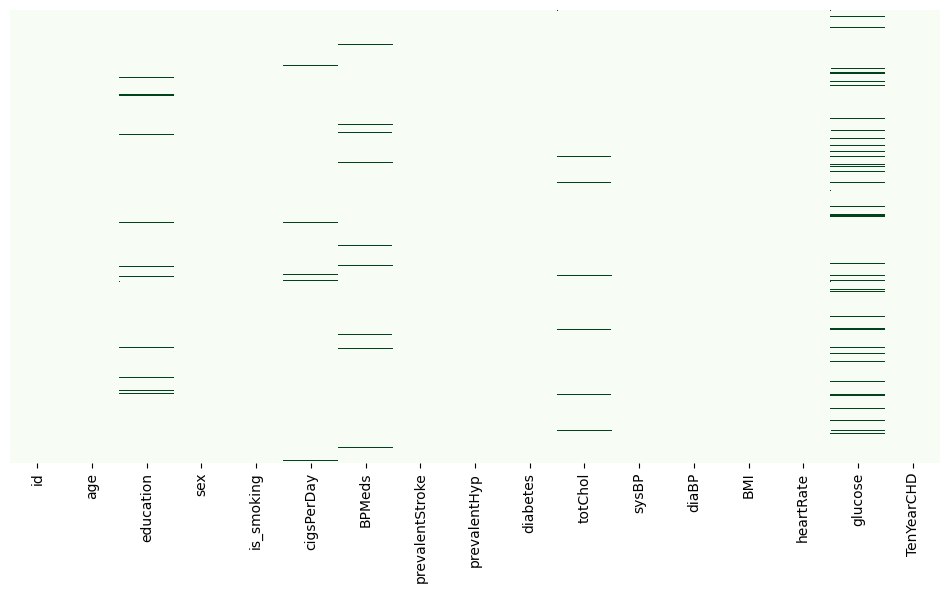

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

###Here, we can observe that 7 variables are having missing values. And 'glucose' is the variable with 9% of missing data. We will deal with the missing values once we are done with the EDA.

##**Univariate Analysis**

###**( a ) Analysing the data through pie chart**

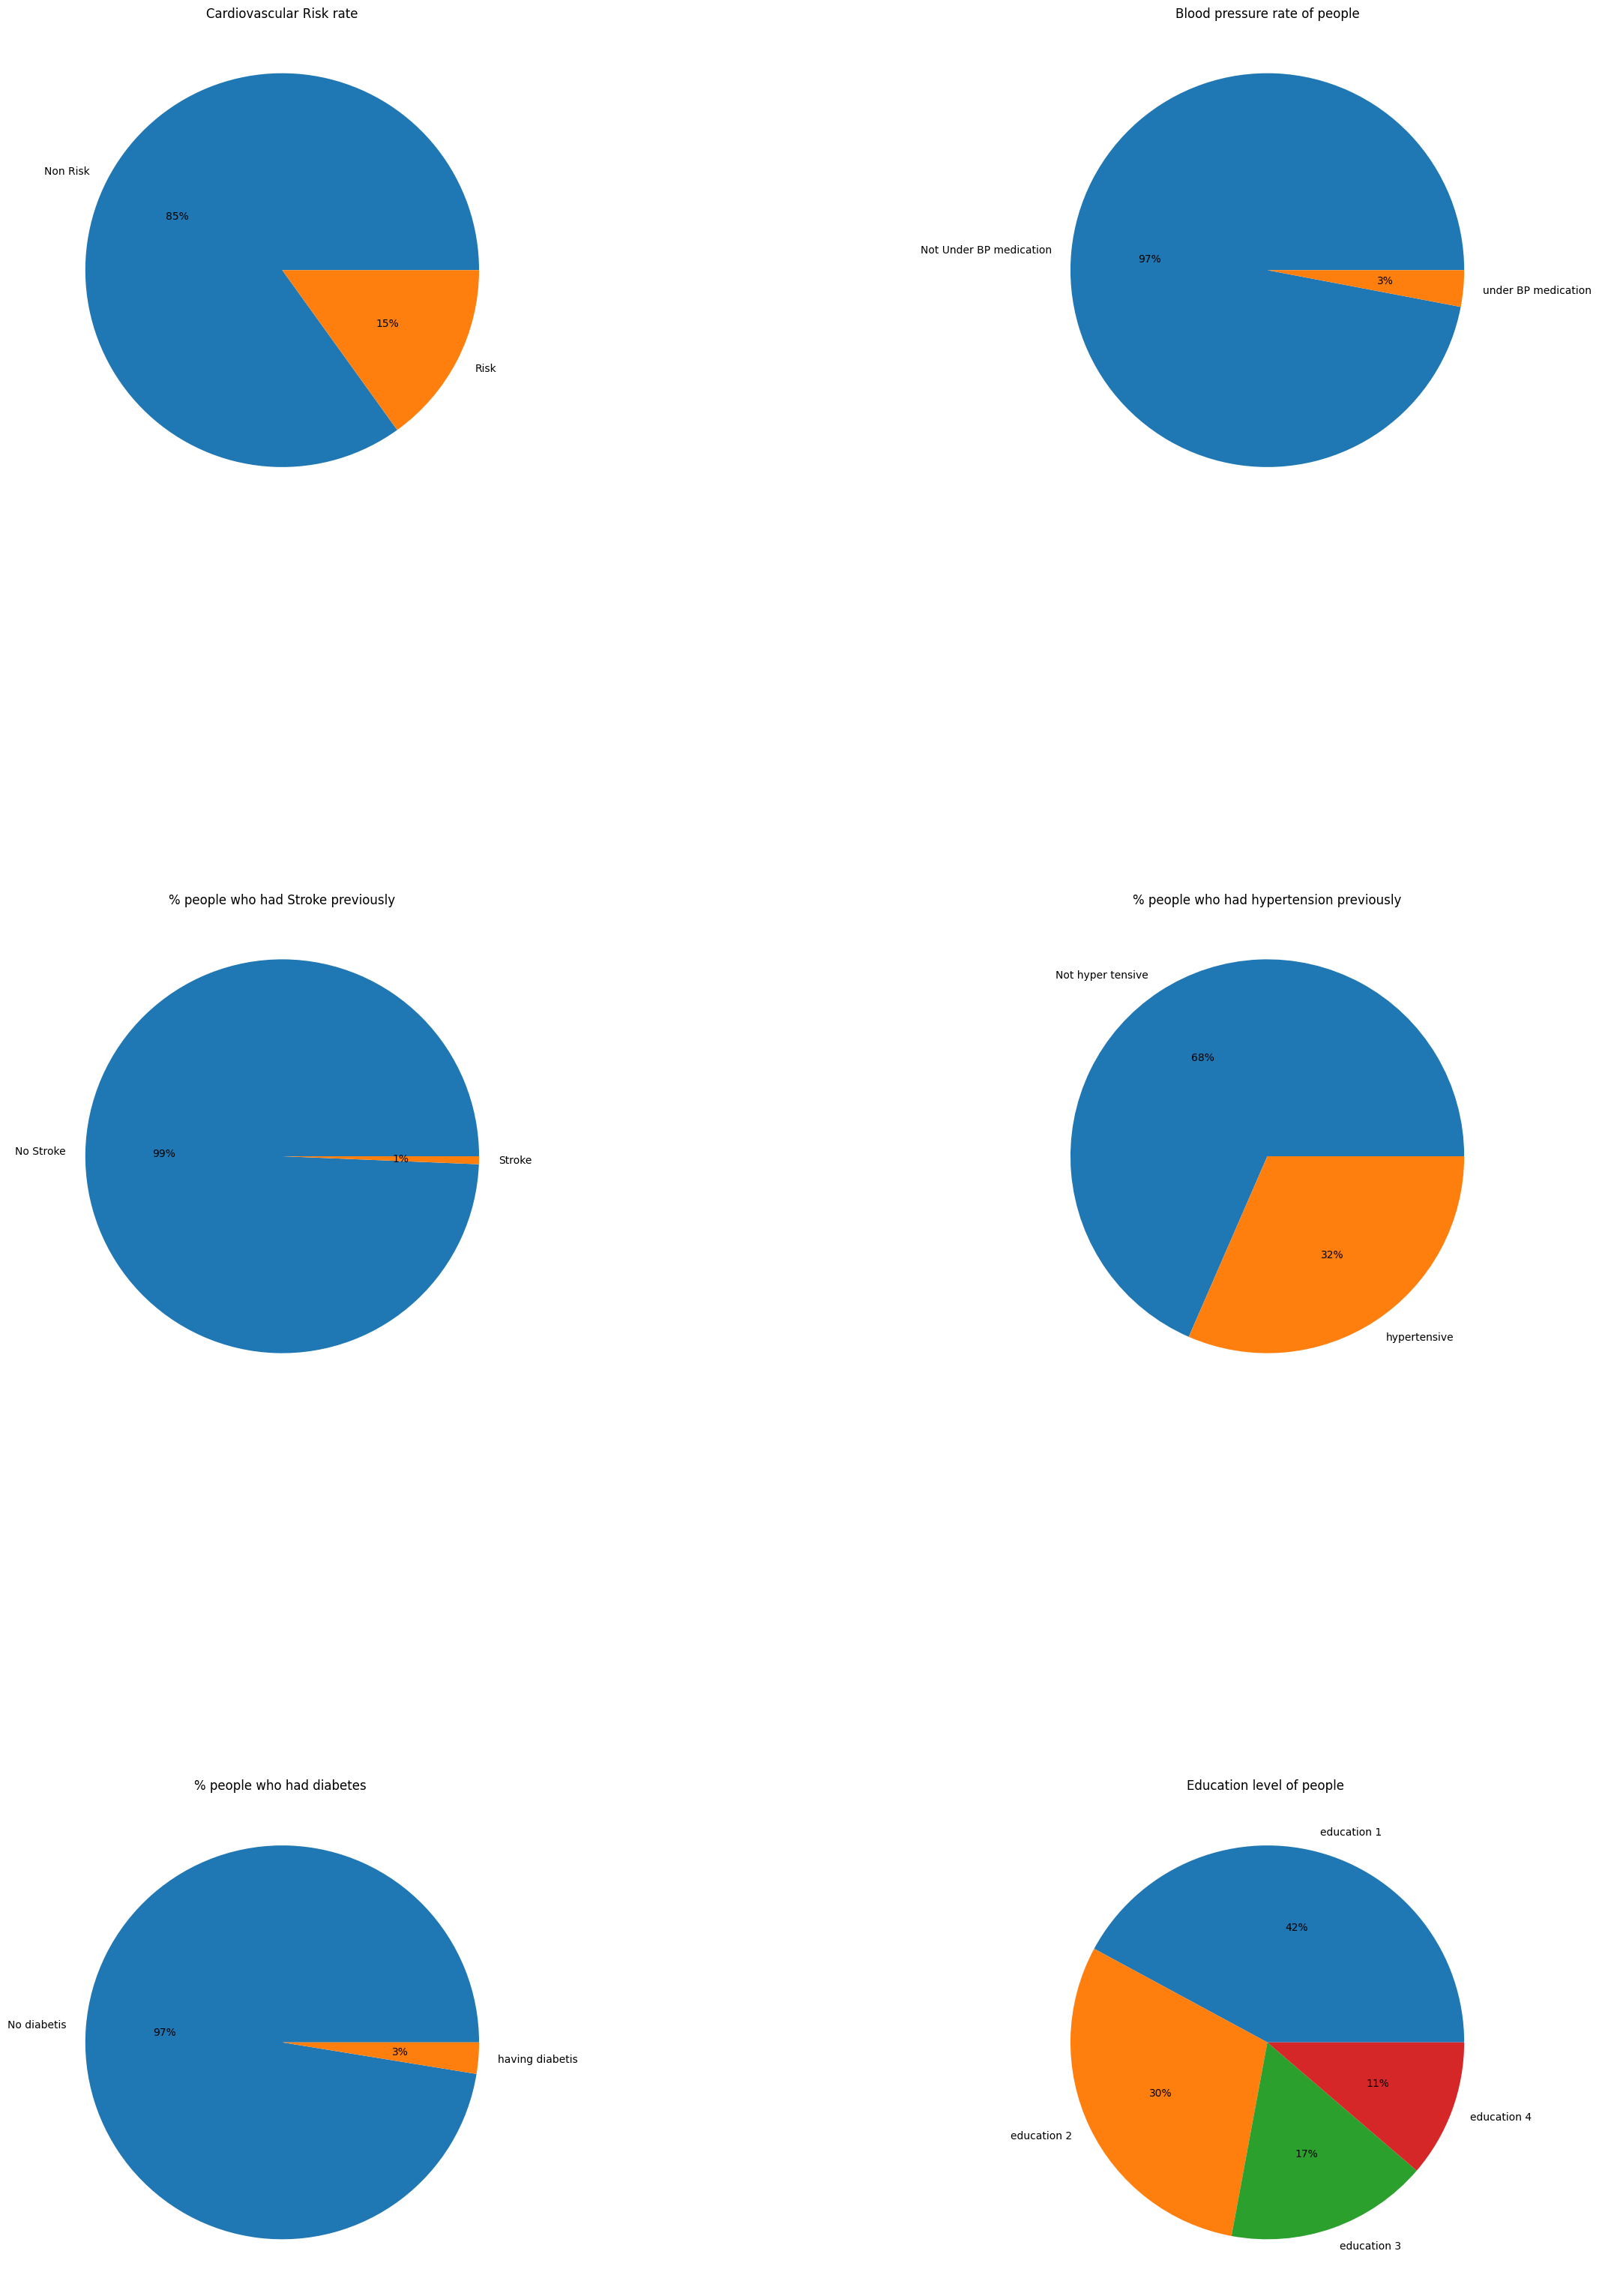

In [ ]:
fig, ax = plt.subplots(figsize = (30, 40))

plt.subplot(3,2,1)
labels = 'Non Risk',"Risk"
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Cardiovascular Risk rate")

plt.subplot(3,2,2)
labels = 'Not Under BP medication',"under BP medication"
plt.pie(df['BPMeds'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Blood pressure rate of people")

plt.subplot(3,2,3)
labels = 'No Stroke','Stroke'
plt.pie(df['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had Stroke previously")

plt.subplot(3,2,4)
labels = 'Not hyper tensive','hypertensive'
plt.pie(df['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had hypertension previously")

plt.subplot(3,2,5)
labels = 'No diabetis','having diabetis'
plt.pie(df['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had diabetes ")

plt.subplot(3,2,6)
labels = 'education 1','education 2','education 3','education 4'
plt.pie(df['education'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Education level of people ")

plt.subplots_adjust(hspace= 0.8, wspace= 0.3)
plt.show()

###Now, we can conclude that,

(1) There are 85% of people are actually not at risk of Cardio Vascular Risk.

(2) There are only 3% of people who are under BP medication.

(3) There are only 1% of people who had stroke previously.

(4) There are 32% of people who are having Hyper Tension.

(5) There are 97% of the people who are non diabetic.

(6) There are 11%(least) of the people are having highest level education and 42%(highest) of the people are having basic education level.

###**Numerical data Analysis**

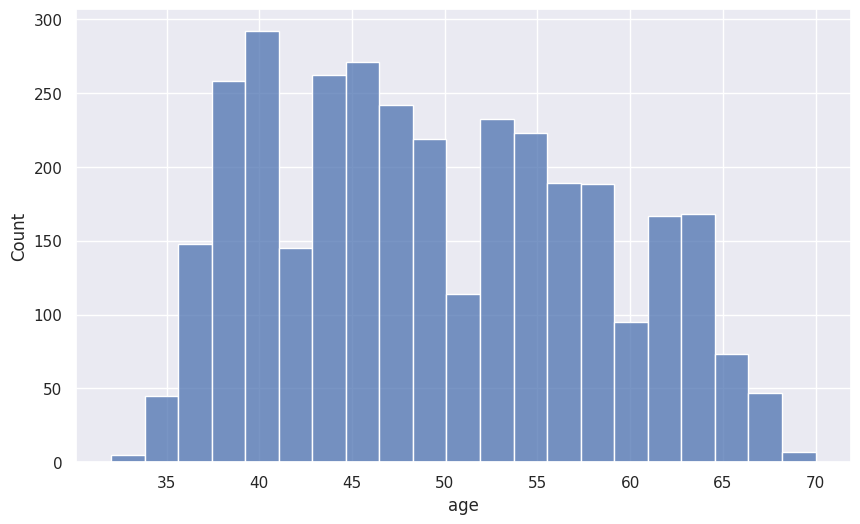

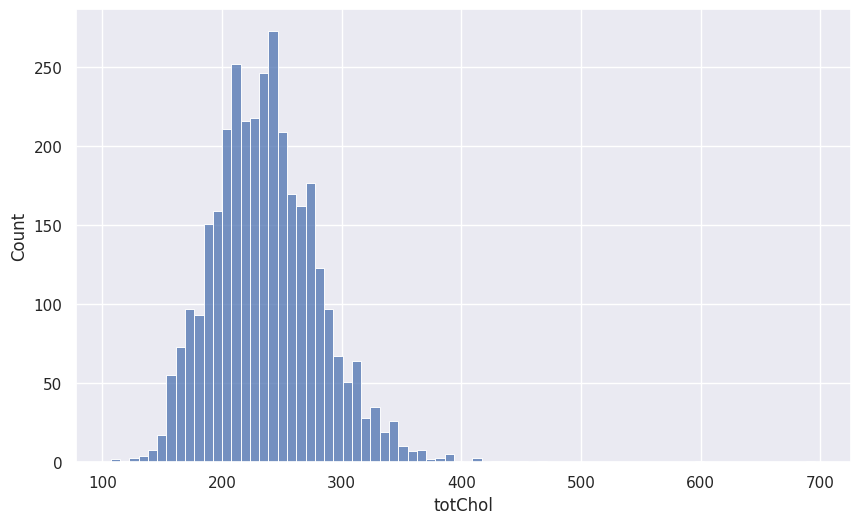

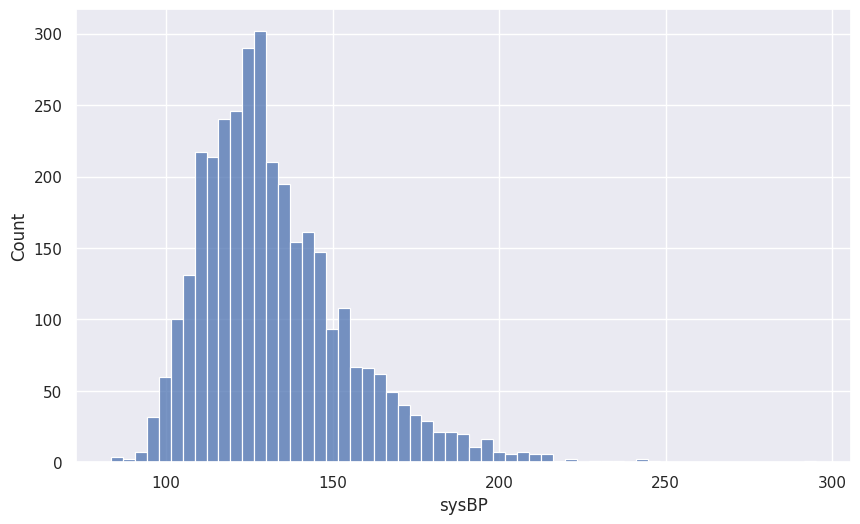

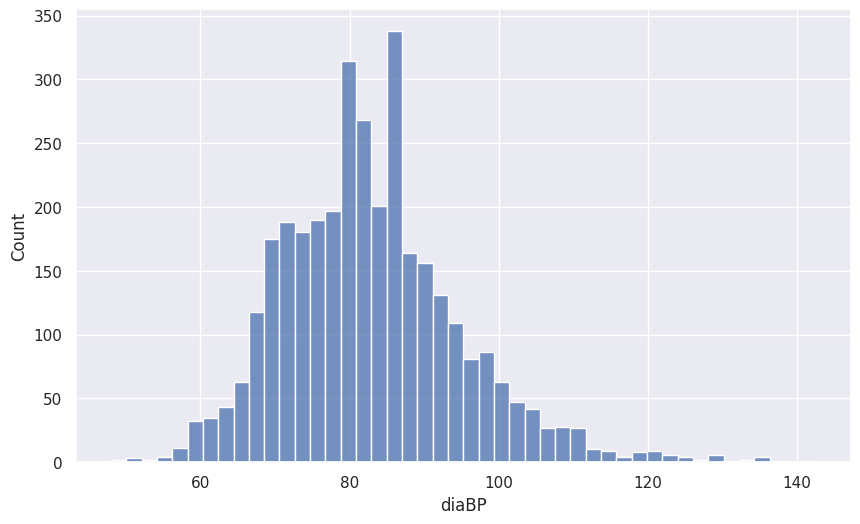

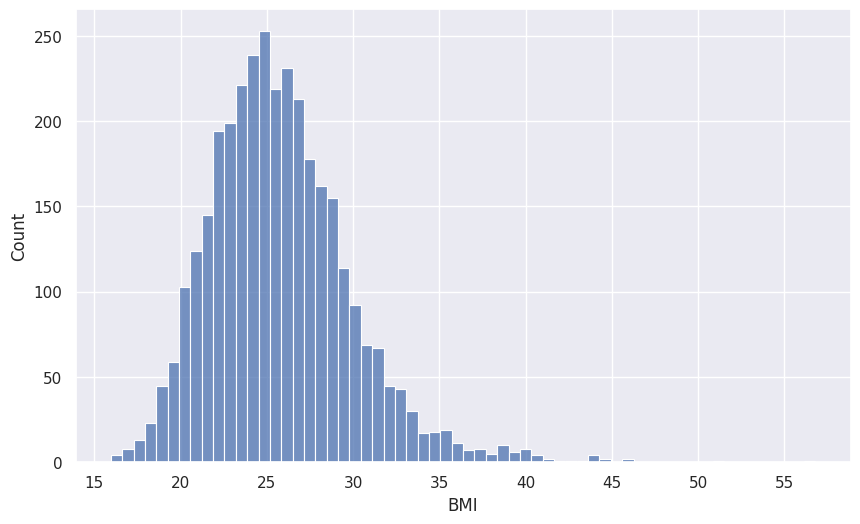

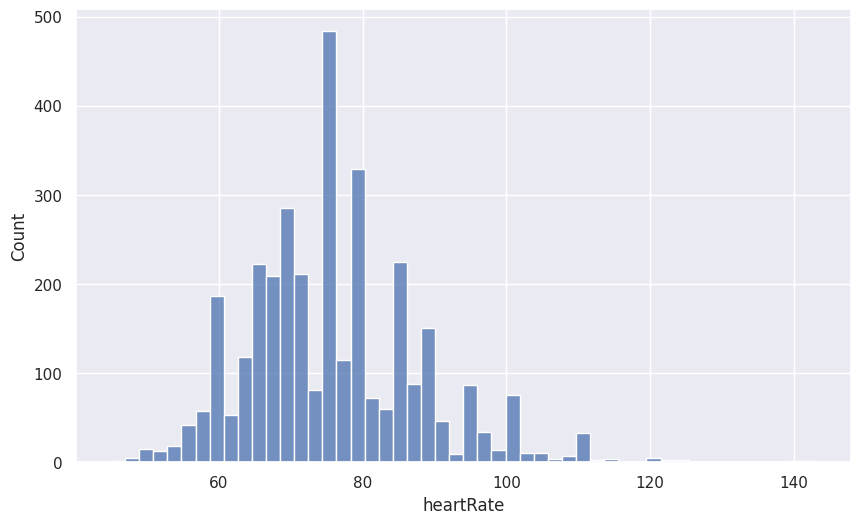

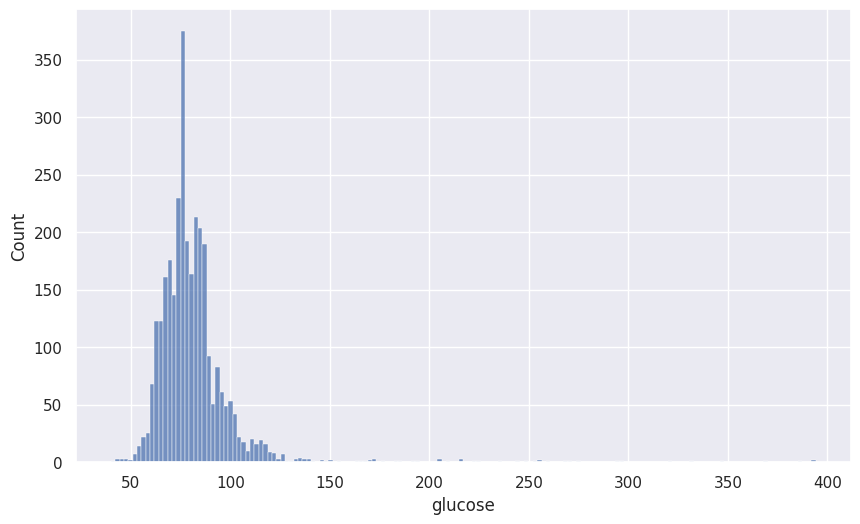

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numerical_columns:
  if i != 'id':
    plt.figure(figsize=(10,6))
    sns.histplot(df[i])

###Here we tried plotting Histogram for all numerical variables.

##**Bivariate Analysis**

###**( a ) Numerical columns with the dependent variable**
####**( i ) Violin plot for all numerical varibles along with dependent variables**

In [ ]:
numerical_columns

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

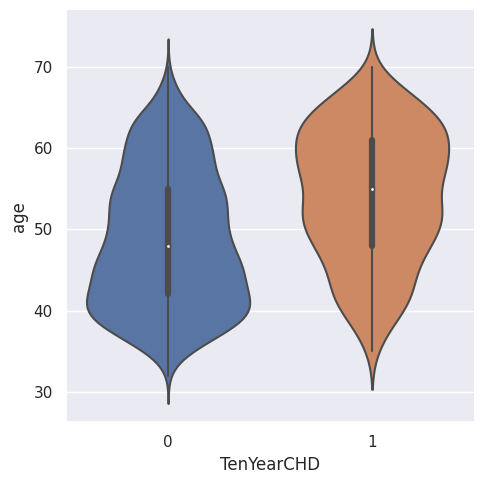

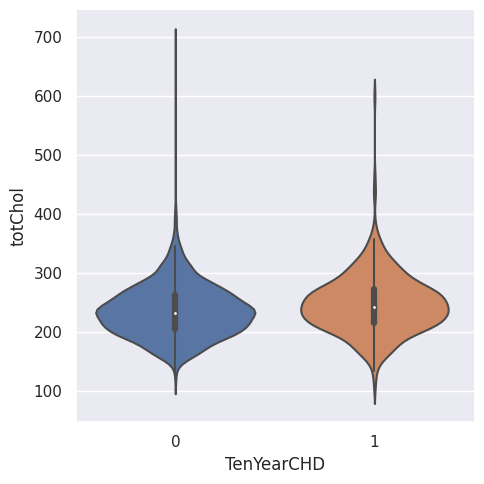

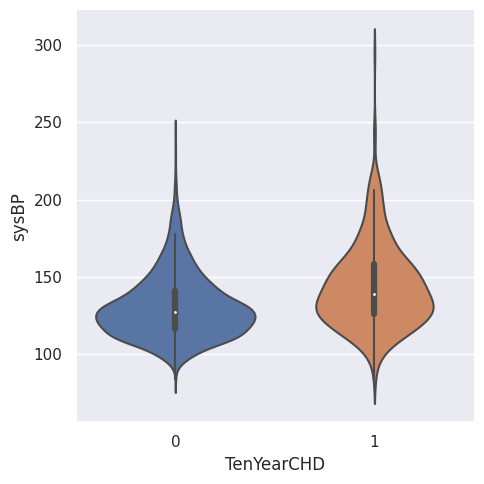

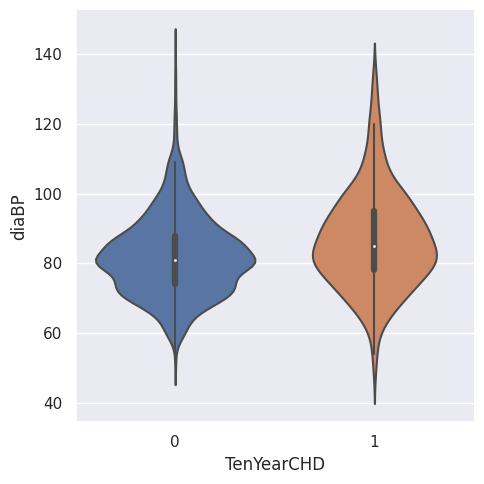

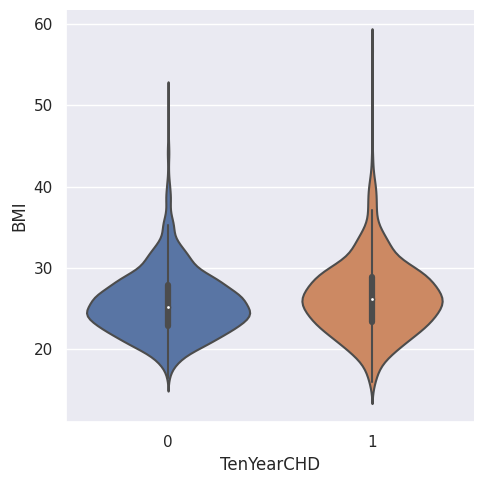

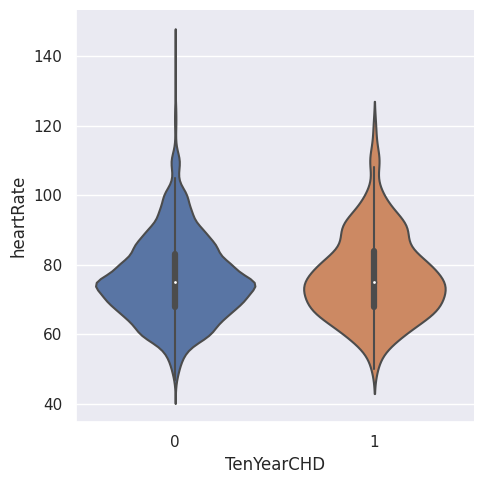

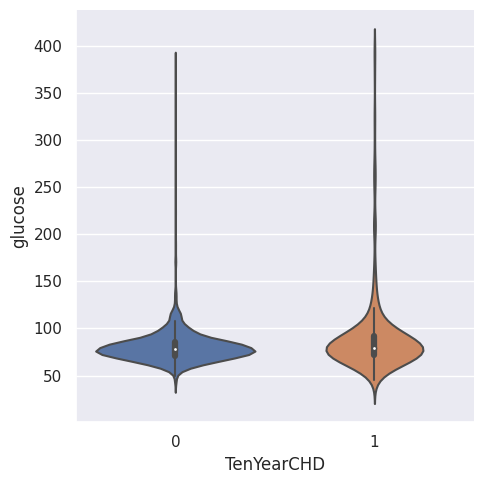

In [ ]:
for i in numerical_columns:
  sns.catplot(x="TenYearCHD", y=i, kind='violin',data=df)

###**( ii ) Bar plot for al the numerical variables along with dependent variable**

In [ ]:
numerical_columns

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

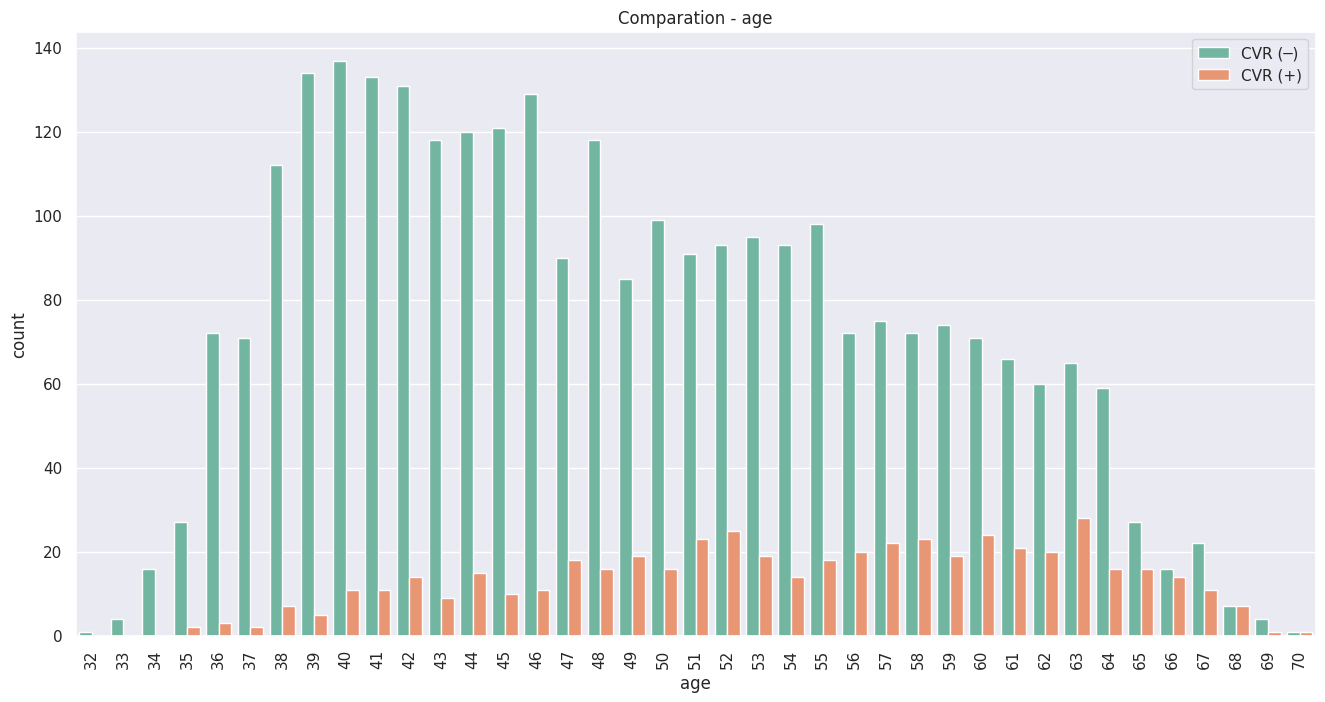

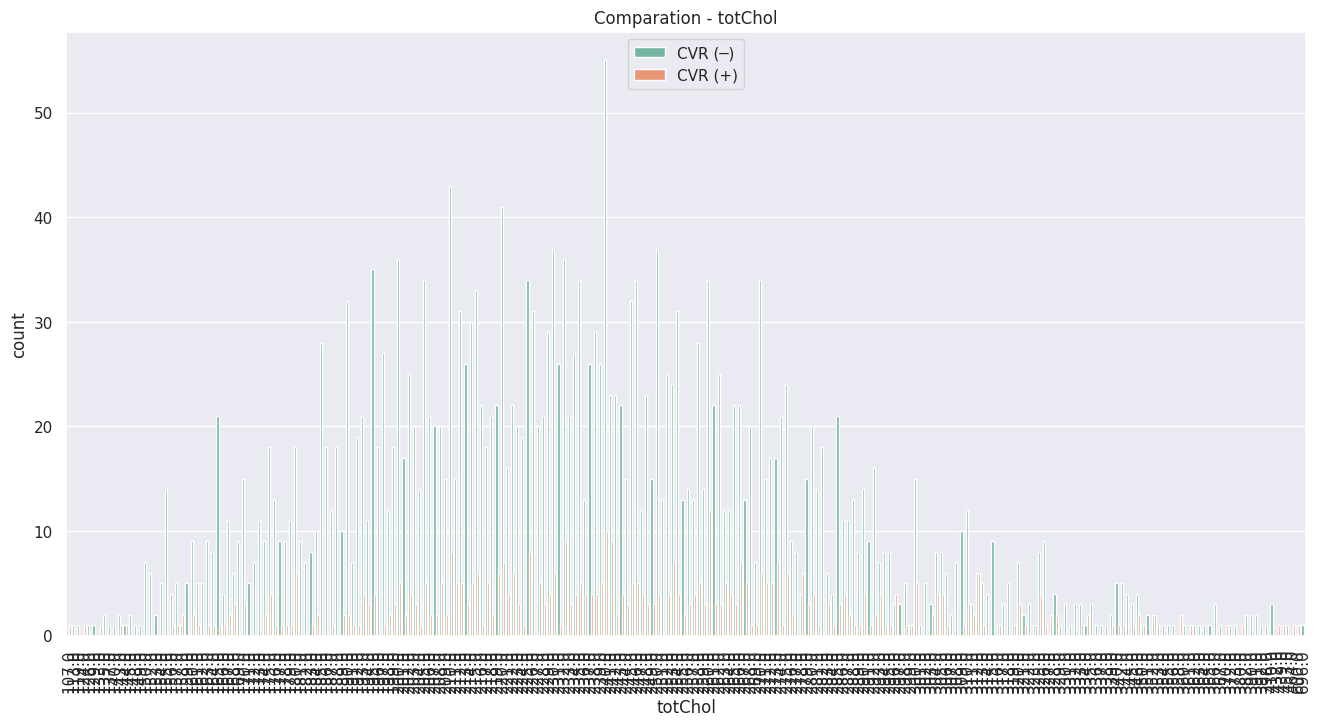

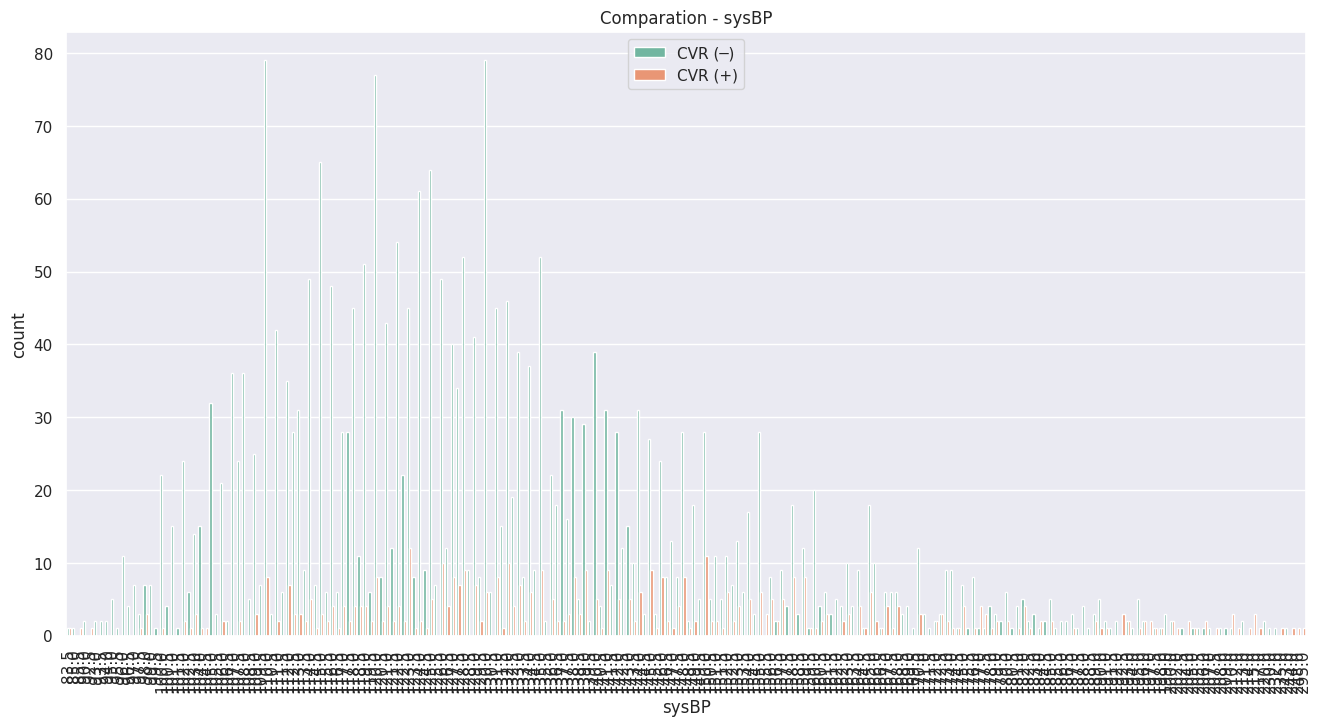

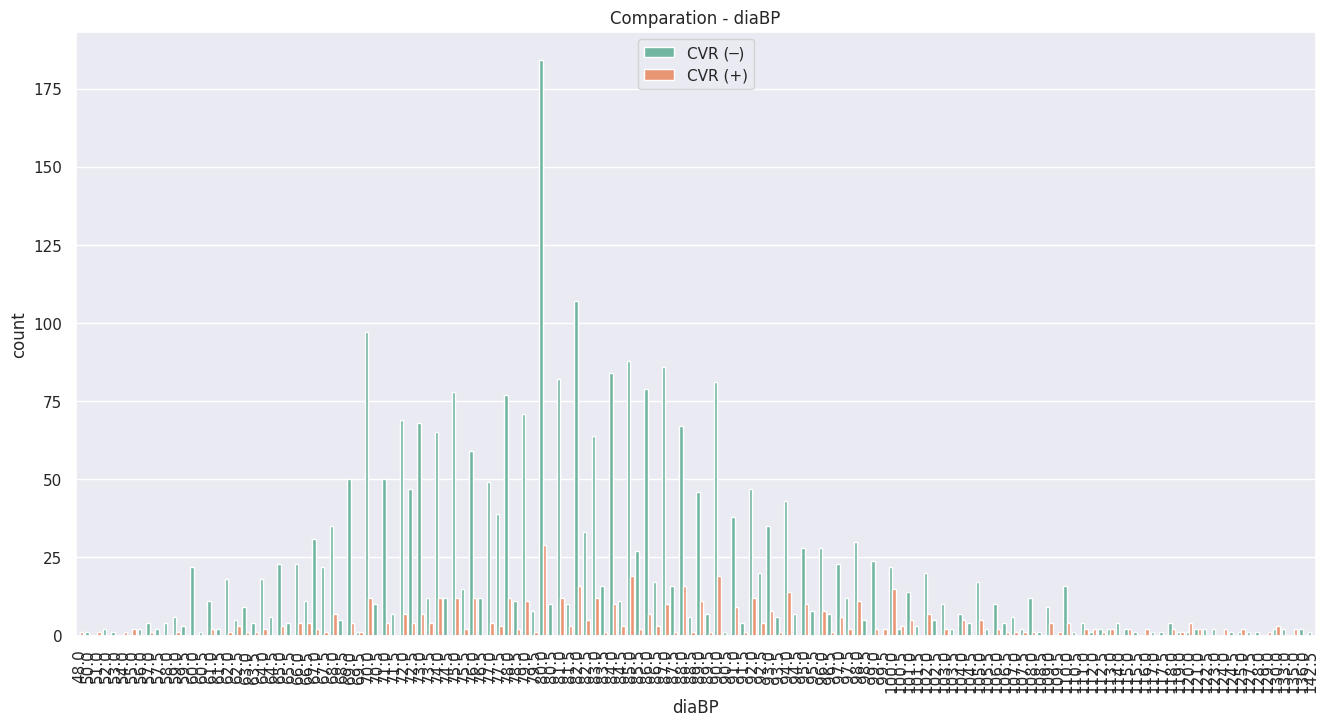

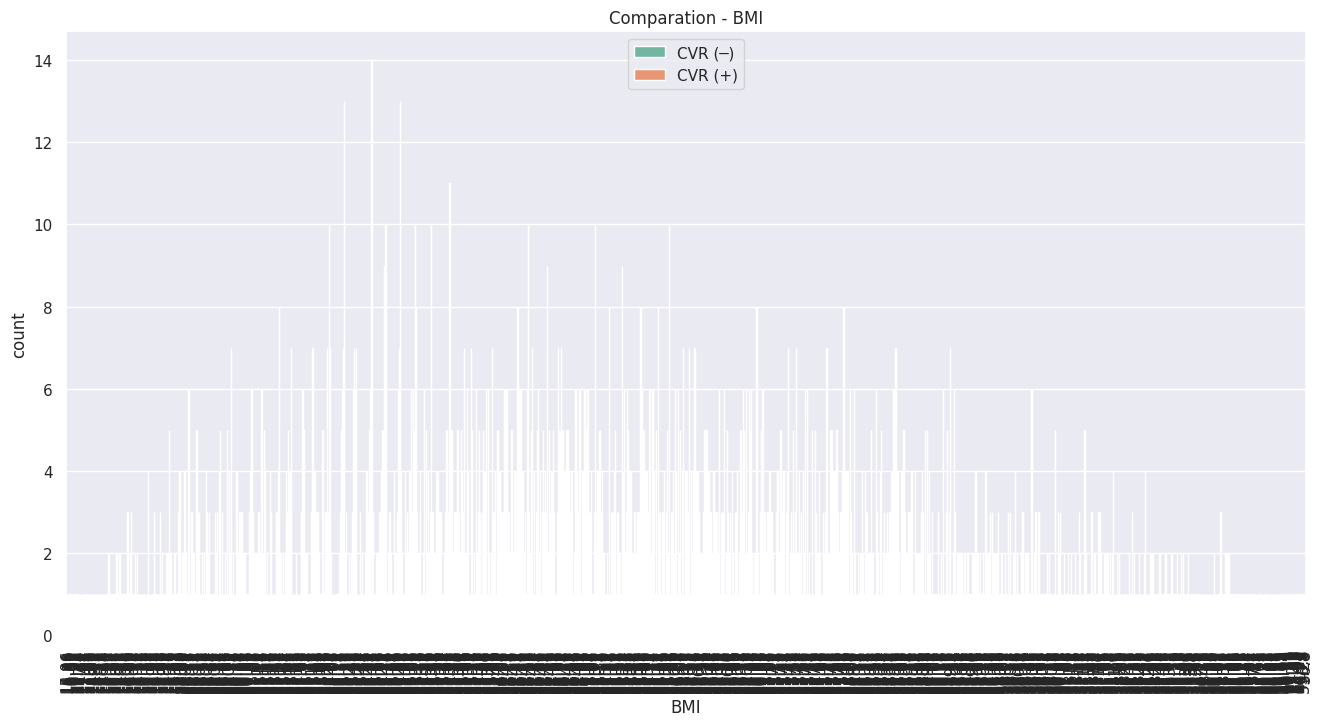

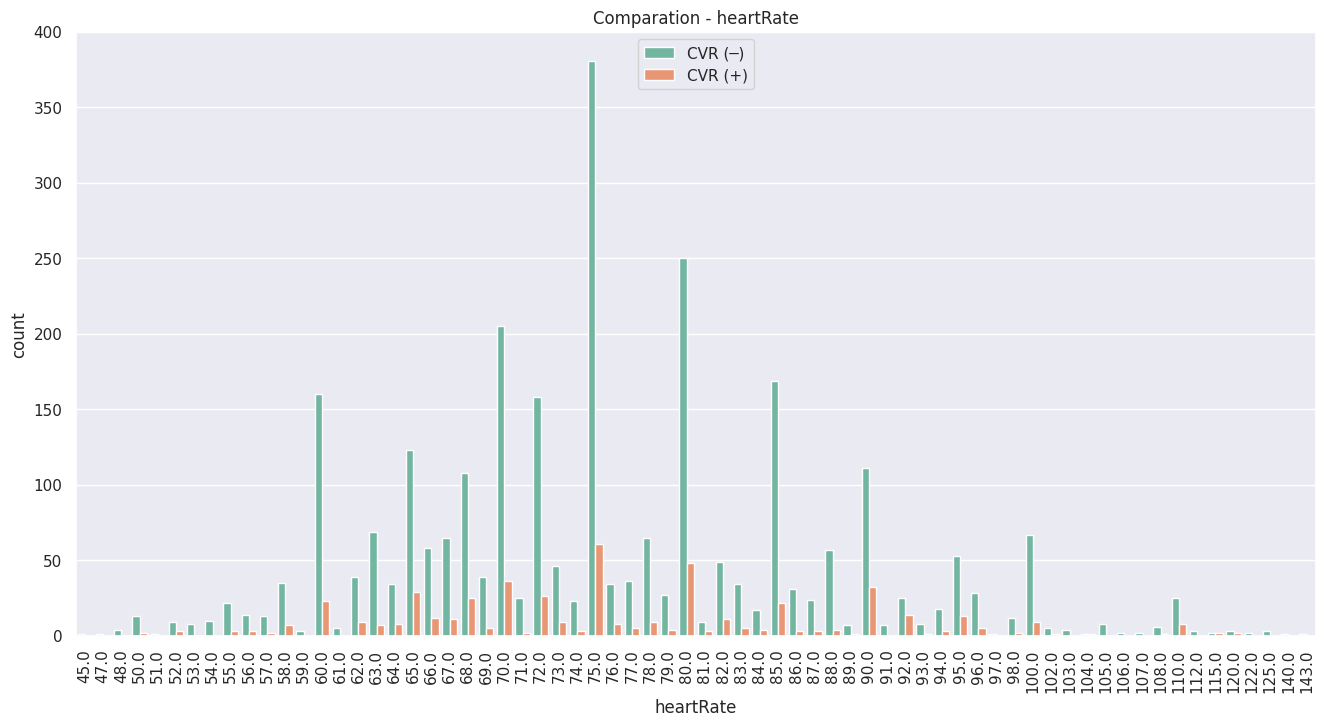

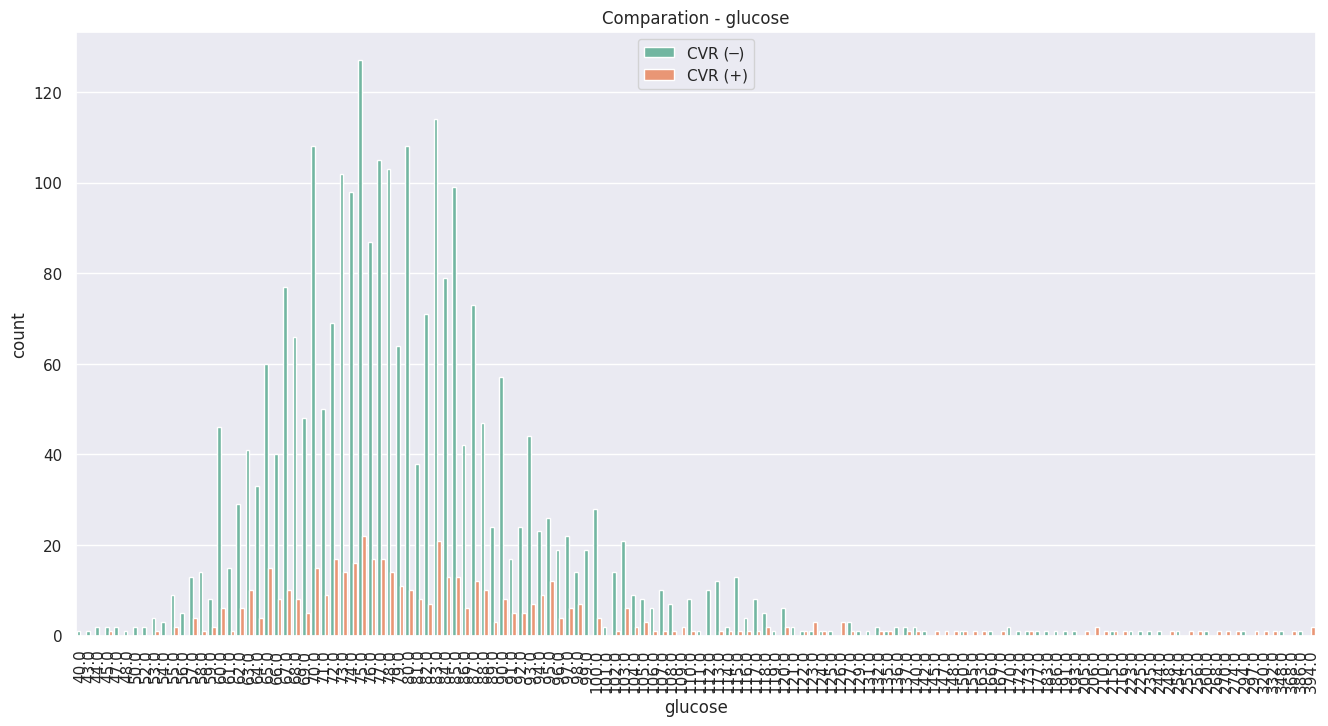

In [ ]:
from matplotlib import rcParams

def NumPlot(df, col):
    # rcParams['figure.figsize'] = 11, 8
    plt.figure(figsize=(16,8))
    plt.xticks(rotation=90)
    sns.countplot(x=col, hue='TenYearCHD', data = df, palette="Set2")
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CVR (─)', 'CVR (+)'])

for i in numerical_columns:
  NumPlot(df,i)

###Here, we tried plotting all numerical varables with the dependent variables. From here we can conclude that,

(1) The major people who are having Cardio Vasclar Risk(CVR) are at the age of 50-70.

(2) The cholestrol level of people is same for both kind of people who are at risk of CVR and not at risk of CVR. Instead fewer people who are not at risk of CVR are having high Cholestrol level.

(3) If we consider sysBP and diaBP together into consideration, then most of the people are having normal BP. So its hard to conclude to here about the CVR.

(4) Even though many people are having normal range of BMI, but the people whoevever are having high BMI, they are at risk of CVR.

(5) Many people are having normal heartrate range, so its not appropriate to come into conclusion about the CVR at this stage.

(6) In glucose level, we can see some outliers in both kind of people(whoa are at risk and not at risk). But the people who got high glucose level are coming into the category of CVR. So we can conclude that its even one of the factor which may contribute to CVR.

###**( b ) Categorical variable with the dependent variable**

In [ ]:
categorical_columns

['education',
 'cigsPerDay',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

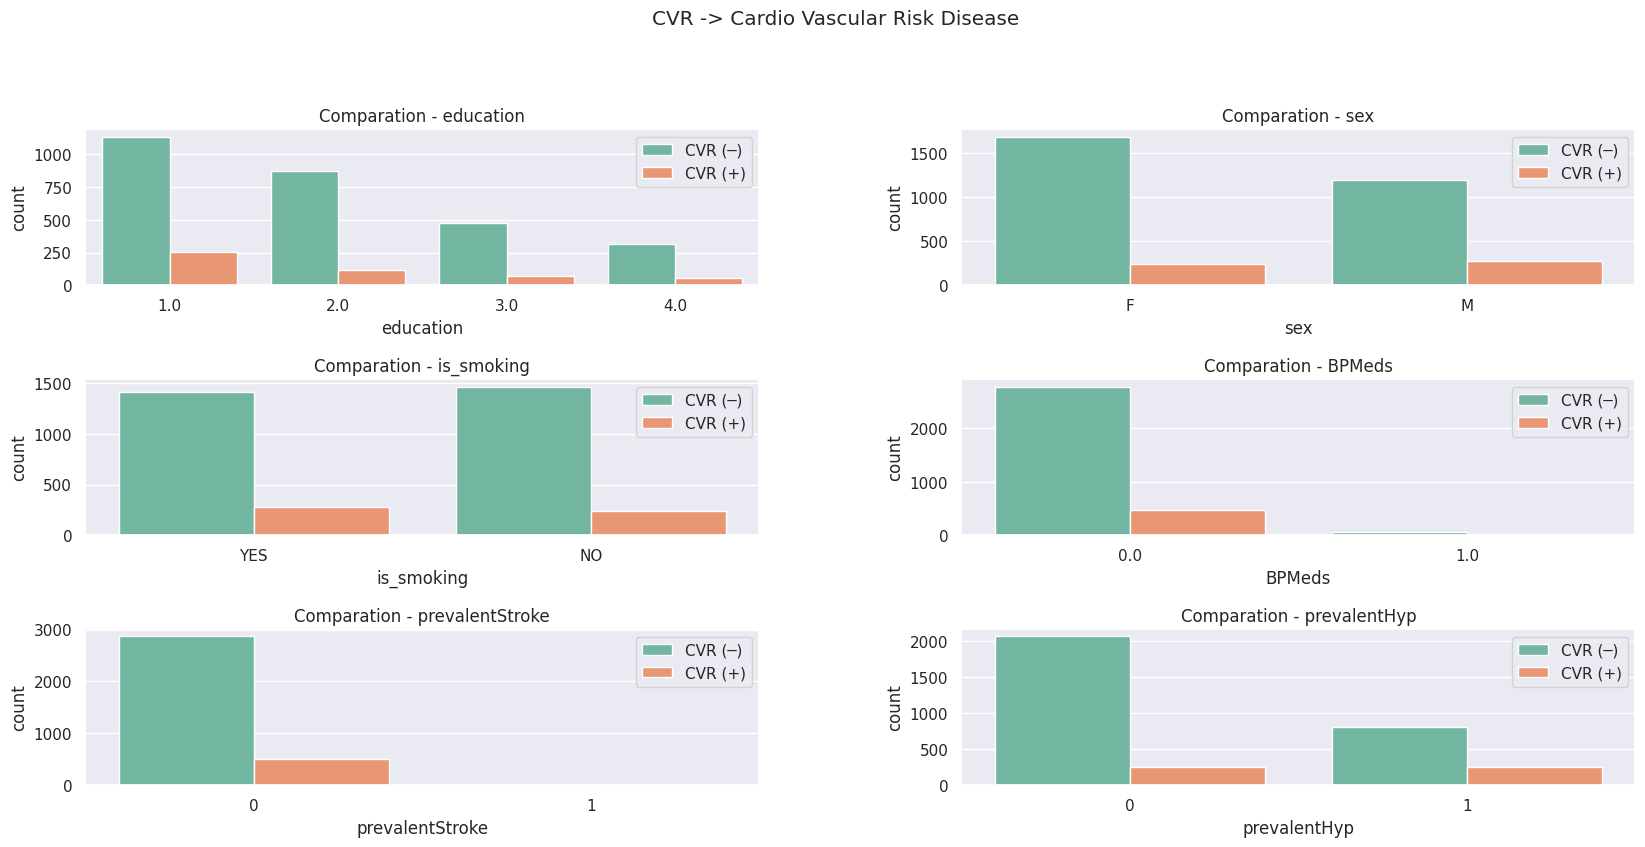

In [ ]:
def habitPlot(df, col):
    sns.countplot(x= col,
                  hue= 'TenYearCHD',
                  data= df, palette="Set2")
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CVR (─)', 'CVR (+)'])

fig, ax = plt.subplots(figsize = (20, 12))
fig.suptitle('CVR -> Cardio Vascular Risk Disease')

plt.subplot(4,2,1)
habitPlot(df, 'education')

plt.subplot(4,2,2)
habitPlot(df, 'sex')

plt.subplot(4,2,3)
habitPlot(df, 'is_smoking')

plt.subplot(4,2,4)
habitPlot(df, 'BPMeds')

plt.subplot(4,2,5)
habitPlot(df, 'prevalentStroke')

plt.subplot(4,2,6)
habitPlot(df, 'prevalentHyp')

plt.subplots_adjust(hspace= 0.6, wspace= 0.3)
plt.show()

###Here, we are plotting the graph for the dependent variable along with the categorical variables present in the dataset.

We can conclude from here that,

(1) The people whoever already under the HyperTension, are at more risk of CVR

(2) But its not the same in case of people who were under the attack of stroke once before. The people who never got the stroke are at high risk of CVR.

(3) Whether people smoke or not smoke, they are at risk of CVR.

(4) Its shocking to see that the people who never got any medication barely comes under the risk of CVR. The people who are under BP medications are at high risk of CVR.

(5) When we compare males and females, males are at more risk of CVR.

(6) We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And its gradually decreasing with increase in education. It might be because that the people wo are educated are taking much precaustions to avoid CVR.

##**Multivariate Analysis**

In [ ]:
numerical_columns

###Here we are trying to get some conclusions about some numerical columns. So we tried plotting the same along with CVR and few more important variables whichever is useful to to come to conclusion.

###**( a ) Age and CVR with other numerical columns**

In [ ]:
for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

###Here we can observe that,

(1) The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.

(2) The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.

(3) If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR.

###**( b ) Education and CVR with other numerical columns**

In [ ]:
for i in numerical_columns:
  sns.catplot(x="education", y=i, hue="TenYearCHD", kind="violin", data=df,height=5, aspect=3)

###From this we can conclude that,

(1) The people who had the basic level education are at more risk of CVR when we compare the levels of education.

(2) Cholestrol level is high for fewer people in education level 2. But people who had basic education were at more risk of CVR.

(3) People with only the basic education are having more BP(considering sysBP,diaBP together), heartrate and BMI as well. So they are directly at more risk of CVR.

(4) People with the highest education (Education 4) are having controlled balanced glucose level. But other fewer people with other education levels are having very high cholestrol. We cna see a peak in glucose level in education leval 3 group peopl

###**( c ) Sex and CVR with other numerical columns**

In [ ]:
for i in numerical_columns:
  sns.catplot(x="sex", y=i, hue="TenYearCHD", kind="violin", data=df,height=5, aspect=3)

###From here we can conclude that,

(1) Females are having high BP, high heart rate, high BMI and even high values of glucose. But the females who are between the age group of 50-70 are at more risk of CVR.

(2) Males between the age group 40-70 are at more risk of CVR.

(3)Whoever had the highest glucose level amongst men all comes under the risk of CVR.

(4) We can see that some of the highest cholestrol values are obtained by men (alone). This might be the reason that they are at high risk of CVR.

(5) But many men maintained normal range of BP, heartrate and BMI.

###**( d ) Diabetes and CVR with other numerical columns**

In [ ]:
for i in numerical_columns:
  sns.catplot(x="diabetes", y=i, hue="TenYearCHD", kind="violin", data=df,height=5, aspect=3)

###Here, we can observe that,

(1) Even though they had diabetes or not, they are at same level of risk of CVR. But its high between the age group 50-70.

(2) We say that cholestrol and diabetes are related, but from the data, its contrary to our assumption. Even though many people have very high level of high cholestrol, they were not at risk of diabetes nor CVR. But if people had diabetes and cholestrol levels are high then they are at high risk of CVR.

(3) BP and heartrate has nothing to do th the diabetes in here. Many people who are at risk of CVR and diabetes are actually maintaining a normal range of BP and heart rate.

(4) If people are already having diabetes and if they have high BMI then they are at high risk of CVR.

###**( e ) Some more analysis about Sex column**

In [ ]:
sns.catplot(x="education", y="glucose", hue="TenYearCHD",
            col="sex", aspect=.7,
            kind="bar", data=df)
#you can change kind to bar/swan/anything

###From here we can conclue that,

(1) Women with the highest education level are maintaining normal level of glucose. And slightly at low risk of CVR when compared to men with the highest education.

(2) Women with the education 2 are having high level of glucose and men with education 3 are having highest level of glucose.

In [ ]:
sns.catplot(x="education", y="is_smoking", hue="TenYearCHD",
            col="sex", aspect=.7,
            kind="violin", data=df)

###We can clearly see that people with the basic level education are smoking alot. and they are at highest risk of CVR.

In [ ]:
sns.catplot(x="age", y="glucose", hue="TenYearCHD",
            col="sex", aspect=1.8,
            kind="bar", data=df)

In [ ]:
sns.catplot(x="age", y="totChol", hue="TenYearCHD",
            col="sex", aspect=1.8,
            kind="bar", data=df)

###Here we can see that, People of age (40-70) whoever are having high level of glucose and cholestrol, all are at high rik of CVR.

##**Distribution plot of all numerical variables**

In [ ]:
#Min max scaler
column_names = numerical_columns
# column_names
#taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
#using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
#print(scaled)
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

###We can observe that there are many people with high level of glucose followed by cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues.

#**Treating Missing values**

###We had already seen that there are 6 variables with missing values. Now we try treating all of the variables one by one. First lets start from categorical variables. We try to replace the missing values by mode of the categorical varibles.

###**( a ) Education null values**

In [ ]:
#Education null values
df['education'].fillna(df['education'].median(),inplace=True)

In [ ]:
df['education'].isna().sum()

###**( b ) BPMeds null values**

In [ ]:
#BPMeds
df['BPMeds'].value_counts()

In [ ]:
#Treating null values
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

In [ ]:
df['BPMeds'].isna().sum()

###**( c ) cigsPerDay null values**

In [ ]:
#cigsPerDay null values
sns.histplot(df['cigsPerDay'])

In [ ]:
df['cigsPerDay'].nunique()

In [ ]:
#as we can see even though there are 32 different ans for cigsPer day..we have a positively skewed data
#so we can create nother category over here.

df['cigsPerDay'].astype("category")

cigsPerDay_data = df['cigsPerDay'].value_counts().reset_index()
cigsPerDay_data.rename(columns={'index':'Number_of_cigar','cigsPerDay':'Number_of_people'},inplace=True)
cigsPerDay_data.sort_values('Number_of_cigar',inplace=True)

In [ ]:
df['cigsPerDay'].isna().sum()

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

###Here,
 we handled the cigsPerDay variable like a categorical variable, its because there are very few unique values present in this column. We completely convert this column as categorical column later while doing the feature engineering.

Now that all the categorical variables missing values are treated with mode, we now try to handle the missing values of Numerical variables.

###**( d ) numeric variables null calues**

In [ ]:
#Now we need to treat Missing values with only numeric variables
numeric_NA=[]
for i in numerical_columns:
  if df[i].isna().sum()>0:
    numeric_NA.append(i)
for i in numeric_NA:
  plt.figure(figsize=(8,6))
  print(i,' Null values are :',round(df[i].isna().sum()/len(df)*100,4))
  sns.distplot(df[i])


In [ ]:
#Here we can observe that all the variables are normally distributed
# and the number of missing values are very less for totChol,BMI and heartRate (<2%)
#But for glucose MV % is ~9%
# so we equate MV of first 3 with mean
# and we use KNN imputer to find the MV of glucose
def fillna_numeric_with_mean(df,col):
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
for i in numeric_NA:
  if i!= 'glucose':
    fillna_numeric_with_mean(df,i)

In [ ]:
#KNN to find the missing values for glucose

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
df['glucose'] = imputer.fit_transform((df['glucose'].values.reshape(-1,1)))

In [ ]:
df.isna().sum()

###Now that all the missing values are treated and even we can see that the distributions were not aletered by handling the missing values.

In [ ]:
for i in numeric_NA:
  plt.figure(figsize=(8,5))
  sns.distplot(df[i])

##**Treating Outliers**

In [ ]:
df[numerical_columns].describe().T

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

###There are not many outliers present in the data. But outliers should never be neglected, so we try treating the outliers by Z-score.

In [ ]:
#Z score treatment
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

In [ ]:
for column in numerical_columns:
  remove_outlier(df,column)

In [ ]:
df_2 =df.copy()

##**Feature Engineering**

In [ ]:
df.head()

###**1. Converting cigsPerDay into a categorical column**

###As we already mentioned, cigsPerDay is the column with very less unique values. It was a discrete numerical variable. So we convert this into a categorical column.

In [ ]:
# herewe can observe that the distribution is not equal
# so we can create another category that
# with 0 cigars = 1st category
# between 1-20 = 2nd category
# between 20-70 = 3rd category
for i in range(len(df)):
  if df['cigsPerDay'][i] == 0:
    df['cigsPerDay'][i] = 'No Cunsumption'
  elif df['cigsPerDay'][i] > 0 and df['cigsPerDay'][i] < 20:
    df['cigsPerDay'][i] = 'Average consumtion'
  else:
    df['cigsPerDay'][i] = 'High Consumption'

In [ ]:
df['cigsPerDay'].value_counts()

###**2. Creating a new variable from sysBP and diaBP**

###Whenever we analyse the BP, we consider sysBP and diaBP together to ge the better result. So here also, we consider these vaues together and create a new categorical column.

In [ ]:
df['BP'] = 0

df.loc[(df['sysBP'] < 120) & (df['diaBP'] < 80), 'BP'] = 1

df.loc[((df['sysBP'] >= 120) & (df['sysBP'] < 130)) &
         ((df['diaBP'] < 80)), 'BP'] = 2

df.loc[((df['sysBP'] >= 130) & (df['sysBP'] < 140)) |
         ((df['diaBP'] >= 80) & (df['diaBP'] < 90)), 'BP'] = 3

df.loc[((df['sysBP'] >= 140) & (df['sysBP'] < 180)) |
         ((df['diaBP'] >= 90) & (df['diaBP'] < 120)), 'BP'] = 4

df.loc[(df['sysBP'] >= 180) | (df['diaBP'] >= 120), 'BP'] = 5

cols_BP = ['sysBP', 'diaBP']
df.drop(cols_BP, axis= 1, inplace= True)

In [ ]:
df.head(10)

###**3. Checking Multicollinearity**

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Greens');

In [ ]:
#Drop DiaBP as its highly correlated to SysBP, prevalentHyp and diabetes 
#df.drop('diaBP',axis=1,inplace=True)
df.drop('prevalentHyp',axis=1,inplace=True)
df.drop('diabetes',axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Greens');

###Multicollinearity should be checked till we build models to make sure that we are not adding any variables with high correlation.

###**4. Transformation**

In [ ]:
import scipy.stats as stats
import pylab

def to_plot(DF,column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()

def log_transform(DF,column):
  print("Before Transformation")
  to_plot(DF,column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(DF,column)
  # stats.probplot()

def box_cox_transform(DF,column):
  print("Before Transformation")
  to_plot(DF,column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(DF,column)

In [ ]:
numerical_columns = ['age', 'totChol', 'BMI', 'heartRate', 'glucose']
#updating as we deleted sysBP and diaBP

In [ ]:
#Applying the transformaation to only numerical columns
log_transform(df,'age')
log_transform(df,'totChol')
box_cox_transform(df,'BMI')
log_transform(df,'heartRate')
box_cox_transform(df,'glucose')

In [ ]:
df_3 = df.copy()

###Transformation is not a must thing to do in classification models. but taking a normal distribution variables always improve the performance of the model. So now, we are done with the transformatin, we will use the one-hot encoding to categorical variables.

###**5. One hot encoding**

In [ ]:
categorical_columns = ['education','cigsPerDay', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke','TenYearCHD','BP']
#Updating the categorical columns by removing prevaleHyp and diabetes

In [ ]:
DF =df[categorical_columns]
#dropping the dependent variable
DF.drop('TenYearCHD',axis=1,inplace=True)
DF = pd.get_dummies(DF, columns=DF.columns)
DF.head()

###So now we are done with the one-hot encoding, before building our model, we will apply standardization technique to our data to have a smae scale for all the variables.

###**6. MinMaxScaler**

In [ ]:
df.head(2)

In [ ]:
numerical_columns = ['age', 'totChol', 'BMI', 'heartRate', 'glucose']
#Updated the numerical columns as we deleted 'diaBP'

In [ ]:
#Merginf categorical and numerical dependent variables
DF_new = df[numerical_columns].copy()
for i in DF.columns:
  DF_new[i] = DF[i]

In [ ]:
DF_new.head(2)

In [ ]:
#Min max scaler
column_names = list(DF_new.columns)

# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()


#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(DF_new[DF_new.columns])
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(DF_new[DF_new.columns]))
DF_scaled.columns = column_names

In [ ]:
DF_scaled.head()

###**7. Checking mulicollinearity again after one-hot encoding**

In [ ]:
#We tried removing multicolliniearity with only the numerical columns
#now that dummy variables are added, check again for collinearity

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(round(DF_scaled.corr(),2),annot=True,cmap='Greens')

In [ ]:
#We can drop is_smoking column as its highly correlated to consumption of cigarate
DF_scaled.drop('is_smoking_YES',axis=1,inplace=True)
DF_scaled.drop('is_smoking_NO',axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(round(DF_scaled.corr(),2),annot=True,cmap='Greens');

In [ ]:
#Whenever we have only car=tegories then we can drop one as we can its highly negatively correlated
#those columns are sex,BPMeds,prevalenStroke
#So we delete any one category from these
DF_scaled.drop('sex_F',axis=1,inplace=True)
DF_scaled.drop('BPMeds_0.0',axis=1,inplace=True)
DF_scaled.drop('prevalentStroke_0',axis=1,inplace=True)
DF_scaled.drop('cigsPerDay_No Cunsumption',axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(round(DF_scaled.corr(),2),annot=True,cmap='Greens');

###Now, our data is almost set to build a model. We created some variables, had performed one-hot encoding, standarization technique and even checked multicollinearity, we now need to do the feature selection from the set of variables we have.

###**8. Feature selection**

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
DF_scaled.columns

In [ ]:
X = DF_scaled.copy()
y = df['TenYearCHD'].copy()

In [ ]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

In [ ]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
#taking the features whcih ever is having less f scores.
selected_features = ['age','totChol','BMI','glucose','education_1.0','education_2.0','cigsPerDay_High Consumption','sex_M','BPMeds_1.0','prevalentStroke_1','BP_1','BP_3','BP_4','BP_5']
len(selected_features)

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X[selected_features].corr(),annot=True, cmap='Greens')

#**Train Test Split**

In [ ]:
X = X[selected_features]
y = df['TenYearCHD'].copy()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.30, random_state= 5)

###**1. Treat Class imbalance by SMOTE or MSMOTE**
As we had many categorical variables in the dataset, there arises a problem of class imbalance. Its very important to treat the class imbalance before building a model. So we try treating the class imbalance. Here we have used the method of SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y_train))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X_train, y_train)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

#**Build models**

Now we start building models for our classiffication problem. We have used some of the models like,

(1)Logistic regression

(2)Support Vector Machine (SVM)

(3)K nearest neighbour (KNN)

(4)Naive Bayes

(5)Decision Tree

(6)Adaboost

(7)Random Forest

##**1. Building all models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [ ]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
adb = AdaBoostClassifier(algorithm='SAMME.R',random_state=42)
nb = GaussianNB()

In [ ]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "Adaboost" : adb,
          "Naive Bayes" : nb}
scores= { }

In [ ]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [ ]:
# after feature election
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame


We can observe that the accuracy score is high in Adaboost. But by looking into just the accuracy we can not come to any conclusion. So we try the cross validation here.

##**2. Cross validation**

###**i. ROC curve**

In [ ]:
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test, y_test)
plt.rcParams['figure.figsize'] = (10, 10)
plot_roc_curve(ran,X_test, y_test, ax = disp.ax_)
plot_roc_curve(knn,X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm,X_test, y_test, ax = disp.ax_)
plot_roc_curve(lgr,X_test, y_test, ax = disp.ax_)
plot_roc_curve(adb,X_test, y_test, ax = disp.ax_)
plot_roc_curve(nb,X_test, y_test, ax = disp.ax_)

If we have a look at ROC curve then we can conclude that Naive Bayes and logistic regression are performing well. But again this alone is not sufficient. So we have a look at the evaluation metric and confusion metric of these models.

###**ii. Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


classifiers = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "Adaboost" : adb,
          "Naive Bayes" : nb}

f, axes = plt.subplots(1, 7, figsize=(20, 5), sharey='row')
# fig, (ax1,ax2, ax3) = plt.subplots(1,7,nrows=3, sharex=True)
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['No','Yes'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')

plt.subplots_adjust(wspace=0.40, hspace=0.1)
#axes.grid(False)
f.colorbar(disp.im_, ax=axes)
#plt.grid(False)
#plt.rcParams['axes.grid'] = False
plt.show()

###**iii. An idea about total correct and wrong predictions**

In [ ]:
PN=[]
for key, value in models.items():
    model_data = {}
    model_data["Name"] = key
    value.fit(X_train, y_train)
    predicted = value.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    model_data['True_positive'] = conf_mat[0][0]
    model_data['False_positive'] = conf_mat[0][1]
    model_data['False_negative'] = conf_mat[1][0]
    model_data['True_negative']= conf_mat[1][1]
    model_data['Correct_prediction'] = model_data['True_positive'] + model_data['True_negative']
    model_data['Wrong_prediction'] = model_data['False_positive'] + model_data['False_negative']
    PN.append(model_data)
PN=pd.DataFrame(PN)
PN

###**iv. Evaluation Metric**

In [ ]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Decision tree', DecisionTreeClassifier()],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Naive Bayes', GaussianNB()],
          ['Random forest', RandomForestClassifier(n_estimators=90)],
          ['SVM', SVC(random_state=6)]
          ]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [ ]:
model_1_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_1_data

Here we are getting a view of all scores of evaluation metric that is train and test accuracy, Precision, Recall and F1 score.

From here we can conclude that,

(1) precision is always more. Its because we have very few amount of class '1' in the dependent variable. So its hard for the model to learn from the data to predict the target variable as '1'. So we try not to consider the value of precision into consideration.

(2) If we have a look into f1 score, its the same in all the models except decision tree, so we can not consider this to evaluate our model performance in here.

(3) So lets just consider, accuracy and recall of these models for evaluation.

(4) First lets just consider recall, the more its near to 1, the more the performance of the model. We can see high recall in Adaboost, Naive Bayes and Random Forest models.

(5) If we now have a look of these 3 models train and test accuracy, then Random forest is overfitting.

(6) So from here, we can conclude that Naive Bayes and Adaboost is performing well.

##**3. Conclusion**

In [ ]:
classifiers = [AdaBoostClassifier(random_state=42),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=79),LogisticRegression(solver='liblinear'),GaussianNB(),RandomForestClassifier(n_estimators=90),SVC(random_state=6)]
classifiers_names = ['Adaboost','Decision tree','KNN','Logistic Regression','Naive Bayes','Random Forest','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

In [ ]:
diff = np.array(training)-np.array(testing)

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We already had concluded that adaboost and naive bayes are performing well. Lets just try all other models with hyperparamter tuning and we will try to observe the performance of these models.

##**Hyper-parameter tuning**
###**Hyperparameter Tuning for all models**
###**1. Hyper parameter tuning - KNN**

In [ ]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

In [ ]:
conf_mat = confusion_matrix(y_test, knn_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**2. Hyper parameter tuning - Random forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred,digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, grid_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**3. Hyper parameter tuning - Logistic Regression**

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**4. Hyper parameter tuning - Decision Tree**

In [ ]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating GridSearchCV object
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
tree_pred = tree_cv.predict(X_test)
print(classification_report(y_test,tree_pred,digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, tree_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**5. Hyper paramter tuning - Adaboost**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.grid_search import GridSearchCV

param_grid_adb = {
    'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

adb = AdaBoostClassifier()

# run grid search
adaboost_cv = GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)
adaboost_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(adaboost_cv.best_params_))
print("Best score is {}".format(adaboost_cv.best_score_))

In [ ]:
adb_pred = adaboost_cv.predict(X_test)
print(classification_report(y_test,adb_pred,digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, adb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**6. Hyper parameter tuning - SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

In [ ]:
svm_pred = svm_cv.predict(X_test)
print(classification_report(y_test,svm_pred,digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, svm_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**7. Hyper parameter tuning - Naive Bayes**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_test, y_test);

In [ ]:
gs_NB.best_params_

In [ ]:
gs_NB.best_score_

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

In [ ]:
#sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

In [ ]:
print(classification_report(y_test,predict_test,digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, predict_test)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

###**( b ) Cross validation after Hyperparameter Tuning**

As we are done with the hyper parameter tuning, we now do the cross validation of these models to get a better idea.

####**i. ROC curve after Hyper Parameter Tuning**

In [ ]:
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test, y_test)
plt.rcParams['figure.figsize'] = (10, 10)
plot_roc_curve(grid,X_test, y_test, ax = disp.ax_)
plot_roc_curve(knn,X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(logreg_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(adaboost_cv,X_test, y_test, ax = disp.ax_)
plot_roc_curve(gs_NB,X_test, y_test, ax = disp.ax_) 
plt.legend(['Random Forest','KNN','SVM','Logistic Regression','Adaboost','Naive Bayes'])

###**ii. Evaluation Metric after hyper parameter tuning**

In [ ]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Adaboost after Hyperparameter Tuning',GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)],
          ['Decision Tree', DecisionTreeClassifier()],
          ['Decision Tree after Hyperparameter Tuning',GridSearchCV(tree, param_dist, cv = 5)],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['KNN after Hyperparameter tuning ', KNeighborsClassifier(n_neighbors=5)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, param_grid_lgr, cv = 5)],
          ['Naive Bayes', GaussianNB()],
          ['Naive Bayes after Hyperparameter tuning',
           GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy')],
          ['Random Forest', RandomForestClassifier(n_estimators=90)],
          ['Random Forest after Hyperparameter Tuning',GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1)],
          ['SVM', SVC(random_state=6)],
          ['SVM after Hyperparameter Tuning',GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
          ]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [ ]:
model_2_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_2_data

##**( c ) Conclusion after HyperParameter Tuning**

In [ ]:
classifiers = [GridSearchCV(adb, param_grid=param_grid_adb, cv = 5),GridSearchCV(tree, param_dist, cv = 5),
               KNeighborsClassifier(n_neighbors=5),GridSearchCV(logreg, param_grid_lgr, cv = 5),
               GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy'),
               GridSearchCV(RandomForestClassifier(),param_grid_rf,verbose=1),GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
classifiers_names = ['Adaboost','Decision tree','KNN','Logistic Regression','Naive Bayes','Random Forest','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

In [ ]:
diff = np.array(training)-np.array(testing)

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

This is the graph after hyper parameter tuning. Even though the accuracy of some models were increased after hyper parameter tuning, still adaboost and naive bayes are the best performing models.

Between those if we compare Naive bayes and Adaboost with the accuracy and recall, Naive Bayes is the best performance model.